## 로이터 데이터셋 로드하기

In [8]:
from tensorflow.keras.datasets import reuters

In [9]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [10]:
train_data[9][:5]

[1, 56, 7224, 81, 40]

In [11]:
word_index = reuters.get_word_index()

revers_w_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_word = ' '.join([revers_w_index.get(i - 3, '?') for i in train_data[0]])

In [12]:
decoded_word

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 데이터 준비_ 벡터로 변환

In [13]:
import numpy as np

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [15]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [16]:
x_train[:30]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [31]:
# !pip install np_utils

  Running setup.py bdist_wheel for np-utils: started
  Running setup.py bdist_wheel for np-utils: finished with status 'done'
  Stored in directory: C:\Users\SkDream\AppData\Local\pip\Cache\wheels\ad\0d\80\266e1b80bc656d54aa327322363b4dfc0c881b07f83882cea1
Successfully built np-utils


In [17]:
# import tensorflow.keras.utils.np_utils
from tensorflow.keras.utils.np_utils import to_categorical
from np_utils import to_categorical

one_hot_train_labels = np_utils.to_categorical(train_labels)
one_hot_test_labels = np_utils.to_categorical(test_labels)

ModuleNotFoundError: No module named 'tensorflow.keras.utils.np_utils'

#### one_hot_벡터 만들기_ 임시 - np_utils가 없어서...

In [22]:
def one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results
    
one_hot_train_labels = one_hot(train_labels)
one_hot_test_labels = one_hot(test_labels)    

In [24]:
print(one_hot_train_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 모델 구성하기

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [5]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [6]:
model.compile( optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
print(x_val[0])

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

[0. 1. 1. ... 0. 0. 0.]


In [26]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 673us/step - loss: 2.6789 - acc: 0.5333 - val_loss: 1.8178 - val_acc: 0.6360
Epoch 2/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.4862 - acc: 0.6988 - val_loss: 1.3498 - val_acc: 0.6900
Epoch 3/20
7982/7982 [==============================] - 1s 117us/step - loss: 1.0765 - acc: 0.7740 - val_loss: 1.1362 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.8456 - acc: 0.8217 - val_loss: 1.0226 - val_acc: 0.7950
Epoch 5/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.6700 - acc: 0.8602 - val_loss: 0.9638 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.5379 - acc: 0.8890 - val_loss: 0.9114 - val_acc: 0.8180
Epoch 7/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.4335 - acc: 0.9131 - val_loss: 0.8934 - val_acc: 0.8200


## 훈련과 검증 손실 그리기

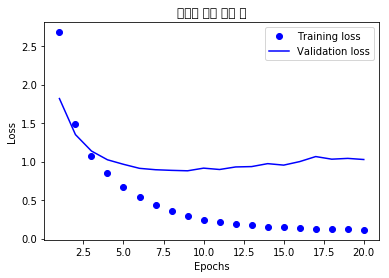

In [31]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('훈련과 검증 손실 값')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## (번외) 그래프 한글 설정 (번외)

In [32]:
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [33]:
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace']) 

serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [34]:
plt.rcParams["font.family"] = 'Nanum Brush Script OTF'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

In [40]:
import matplotlib.font_manager as fm
k = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
print(k)

[]


C:\Users\SkDream\AppData\Local\conda\conda\envs\py36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Nanum Brush Script OTF'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


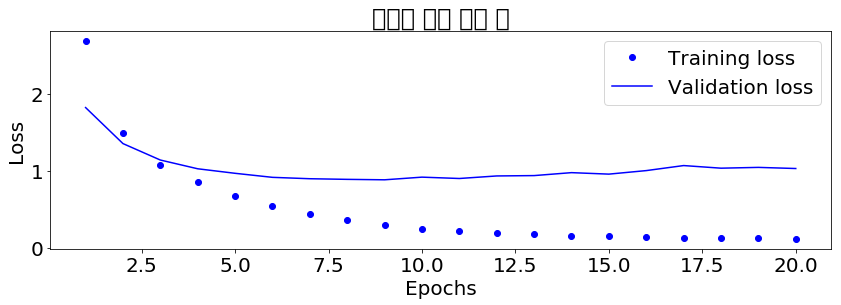

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('훈련과 검증 손실 값')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 정확도 그림 그리기

In [41]:
# 그래프 초기화
plt.clf()

<Figure size 1008x288 with 0 Axes>

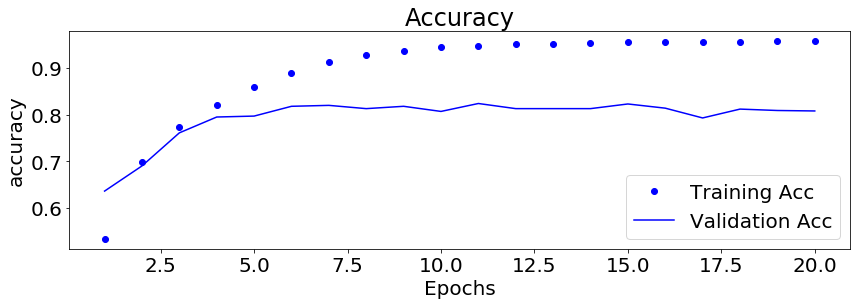

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

9번째에서 오버핏 발생 -- 다시학습

## 다시 훈련하기

In [43]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [44]:
model.compile( optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [45]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 171us/step - loss: 2.5196 - acc: 0.5078 - val_loss: 1.6457 - val_acc: 0.6620
Epoch 2/9
7982/7982 [==============================] - 1s 120us/step - loss: 1.3612 - acc: 0.7176 - val_loss: 1.2689 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 119us/step - loss: 1.0219 - acc: 0.7800 - val_loss: 1.1063 - val_acc: 0.7590
Epoch 4/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.8082 - acc: 0.8230 - val_loss: 1.0144 - val_acc: 0.7870
Epoch 5/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.6326 - acc: 0.8677 - val_loss: 0.9491 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.5060 - acc: 0.8953 - val_loss: 0.9001 - val_acc: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.4099 - acc: 0.9122 - val_loss: 0.8707 - val_acc: 0.8150
Epoch 8

최종결과

In [46]:
results

[1.001498359500141, 0.7796081923684793]

## 새로운 데이터에 대해 예측하기

In [47]:
predictions = model.predict(x_test)

In [48]:
predictions

array([[7.0537162e-06, 4.1212063e-04, 2.0910928e-04, ..., 3.3551564e-06,
        1.4151544e-05, 3.7356369e-06],
       [8.6081214e-04, 1.7065851e-03, 8.2965467e-05, ..., 2.8156559e-04,
        8.3452413e-08, 8.3353276e-05],
       [1.3112331e-02, 6.8455797e-01, 7.8423452e-03, ..., 4.8636142e-04,
        2.0328266e-04, 1.6296948e-03],
       ...,
       [4.1696389e-05, 3.7506054e-04, 3.2950053e-04, ..., 1.7979579e-05,
        2.3173820e-04, 9.6514123e-06],
       [4.3932139e-03, 6.7047521e-02, 6.1589293e-03, ..., 1.6770414e-03,
        4.9527746e-04, 2.3878429e-03],
       [8.0823228e-03, 3.8533252e-01, 3.5298439e-03, ..., 4.5174053e-03,
        1.1582281e-04, 2.2278726e-04]], dtype=float32)

In [49]:
predictions[0].shape

(46,)

In [50]:
np.sum(predictions[0])

1.0

In [51]:
np.argmax(predictions[0])

3

길이가 46인 벡터 ( 원핫인코딩을 46으로했음.)  

벡터의 원소의 합은 항상 1임. (soft_max를 마지막에 사용했기 때문)

이중 가장 높은 값을 찾아서 반환

## 레이블과 손실을다루는 다른 방법

 레이블 인코딩을 변경하면 정수텐서로 변환하면 됨.  
 ex)  
 y_train = np.array(train_labels)  
 
 
 손실함수를 변경 - category --> sparse_categorical 로 변경  

### 중간층이 충분히 커야하는 이유 : 마지막 출력의 차원보다는 큰것이 낫다.  
마지막 출력의 차원보다 작은경우 정보의 병목현상이 나타난다.

In [52]:
!git

'git'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
